In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def get_flow_fields(w_y_trips, t_z=1):
    all_flow_fields = None
    
    for w_y_trip in w_y_trips:
        flow_fields = None

        for w_y in w_y_trip:
            t_x = 0
            t_y = 0
            w_x = 0
            w_z = 0

            x_len = y_len = 28; norm_factor = ((x_len)/2.)**2 + 1.
            xs = np.arange(x_len) - x_len/2.
            ys = np.arange(y_len) - y_len/2.

            XX, YY = np.meshgrid(xs, -ys)

            u_field = np.zeros((x_len, y_len))
            v_field = np.zeros((x_len, y_len))

            for x_ind in range(x_len):
                for y_ind in range(y_len):
                    x = XX[x_ind, y_ind]; y = YY[x_ind, y_ind]

                    t_vec = np.array([t_x, t_y, t_z])
                    t_x_comp = np.array([-1, 0, y])
                    t_y_comp = np.array([0, -1, x])

                    w_vec = np.array([w_x, w_y, w_z])
                    w_x_comp = np.array([x*y, -1*(1 + x**2), y])
                    w_y_comp = np.array([1 + y**2, -1*x*y, -1*x])

                    u_field[x_ind, y_ind] = np.dot(t_x_comp, t_vec) + np.dot(w_x_comp, w_vec)
                    v_field[x_ind, y_ind] = np.dot(t_y_comp, t_vec) + np.dot(w_y_comp, w_vec)

            u_field = u_field/norm_factor
            v_field = v_field/norm_factor

            mag_field = u_field**2 + v_field**2

            flow_field = np.zeros((x_len, y_len, 3))
            flow_field[:,:,0] = u_field
            flow_field[:,:,1] = v_field
            flow_field[:,:,2] = mag_field
            
            f, axes = plt.subplots(1,3)
            f.set_size_inches(20, 5)
            for ind, field in enumerate([u_field, v_field, mag_field]):
                axes[ind].imshow(field)
            plt.show()

            flow_field = flow_field.reshape((1,x_len,y_len,3))

            if flow_fields is None:
                flow_fields = flow_field
            else:
                flow_fields = np.concatenate((flow_fields, flow_field), axis=3)

        if all_flow_fields is None:
            all_flow_fields = flow_fields
        else:
            all_flow_fields = np.concatenate((all_flow_fields, flow_fields), axis=0)


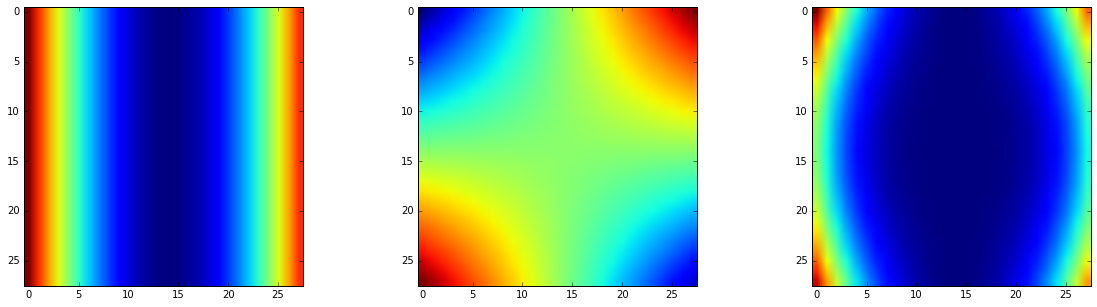

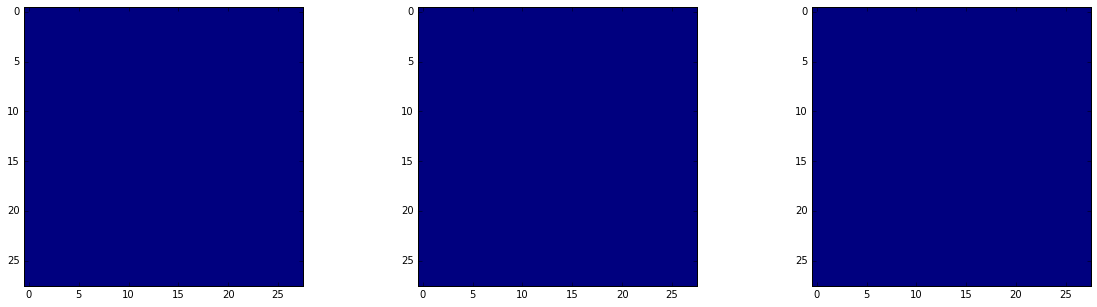

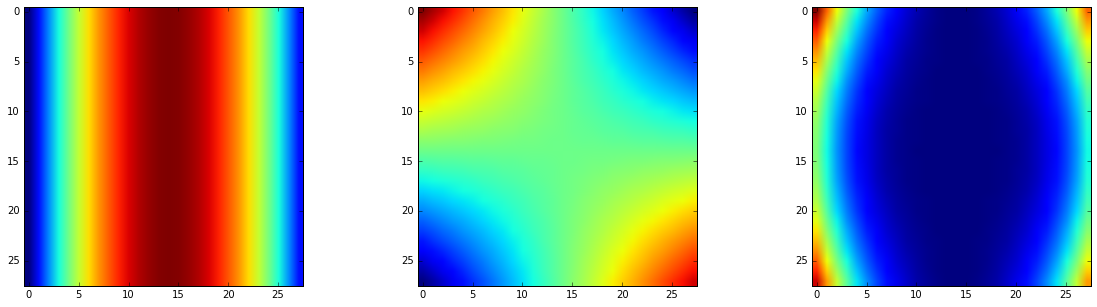

In [10]:
ff = get_flow_fields([[-1, 0, 1]], 0)

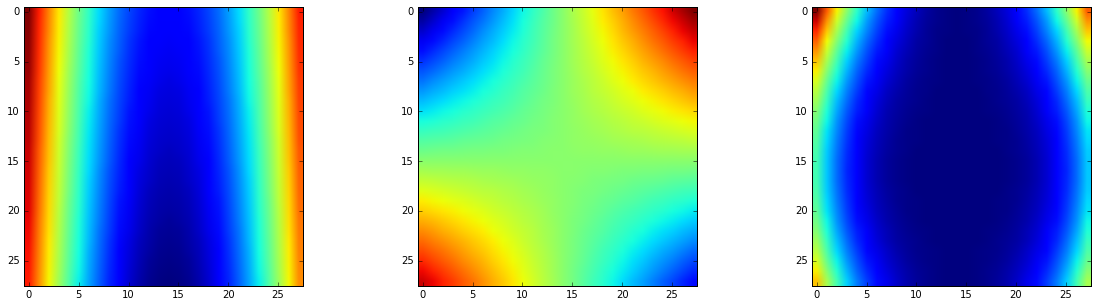

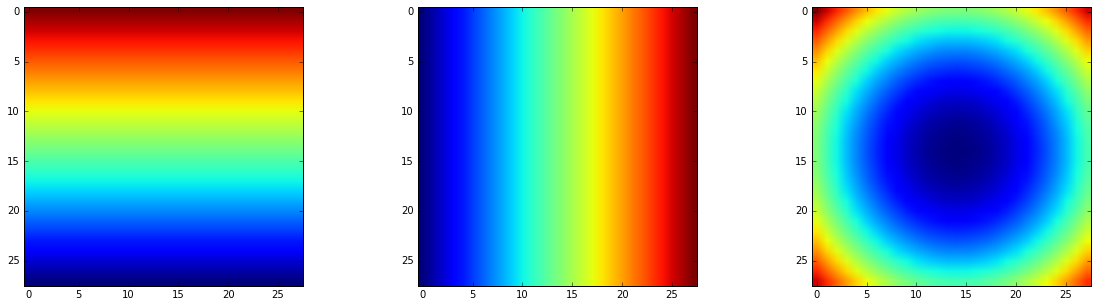

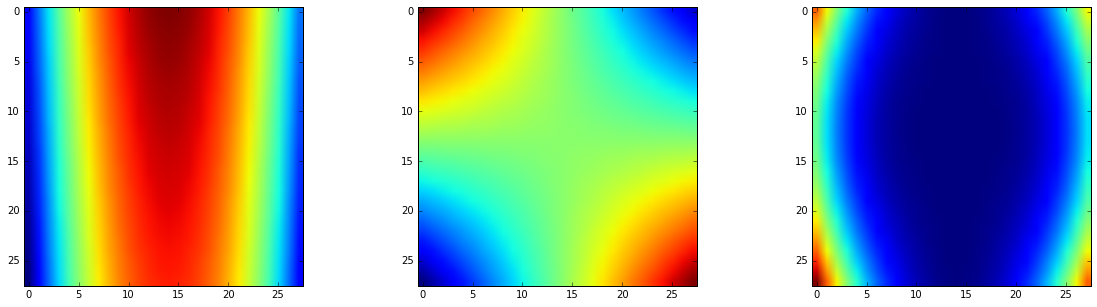

In [11]:
ff = get_flow_fields([[-1, 0, 1]], 1)

In [228]:
ff.shape

(2, 28, 28, 9)

In [ ]:
f, axes = plt.subplots(1, 3)
for i in range(3):
    axes[i].imshow(ff[0,:,:,i])
plt.

In [229]:
uf, vf, mf, af = plot_vec_field(1, 0)

TypeError: 'int' object is not iterable

In [203]:
print('{}, {}'.format(np.min(mf), np.max(mf)))

2.57672189441e-05, 1.98987348295


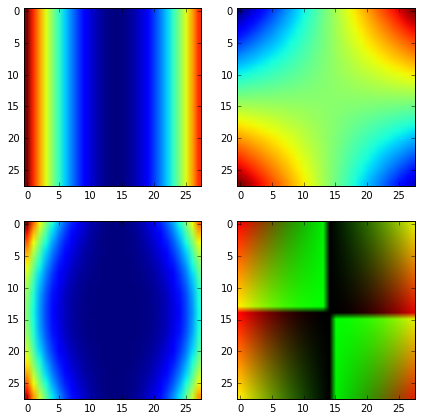

In [204]:
uf, vf, mf, af = plot_vec_field(-1, 0)

In [205]:
print('{}, {}'.format(np.min(af), np.max(af)))

-0.994923857868, 1.0


/home/bala/.local/lib/python2.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in divide
/home/bala/.local/lib/python2.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in divide


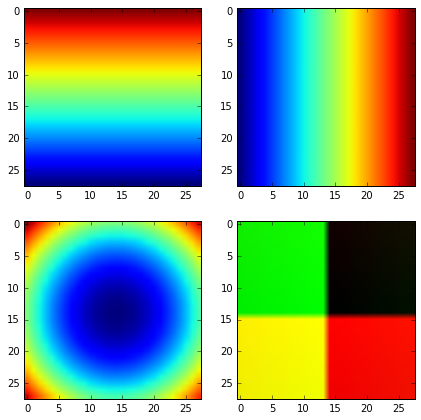

In [206]:
uf, vf, mf, af = plot_vec_field(0, 1)

In [207]:
print('{}, {}'.format(np.min(mf), np.max(mf)))

0.0, 0.0101007498261
